BP2 空间序列代码


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from pylab import rcParams
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 设置随机种子以确保结果的可重复性
RANDOM_SEED = 42
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# 读取数据集
raw_dataset = pd.read_csv('Trina, 10.5kW, mono-Si, Dual, 2009_23-24_data_5min.csv')
raw_dataset2 = pd.read_csv('eco-Kinetics, 26.5kW, mono-Si, Dual, 2010_23-24data_5min.csv')
raw_dataset3 = pd.read_csv('Trina, 23.4kW, mono-Si, Dual, 2009_23-24data_5min.csv')
raw_dataset = raw_dataset[raw_dataset[(raw_dataset['timestamp']=='2023-11-02 00:00:00')].index.to_list()[0]:raw_dataset[(raw_dataset['timestamp']=='2023-12-07 01:25:00')].index.to_list()[0]]
raw_dataset2 = raw_dataset2[raw_dataset2[(raw_dataset2['timestamp']=='2023-11-02 00:00:00')].index.to_list()[0]:raw_dataset2[(raw_dataset2['timestamp']=='2023-12-07 01:25:00')].index.to_list()[0]]
raw_dataset3 = raw_dataset3[raw_dataset3[(raw_dataset3['timestamp']=='2023-11-02 00:00:00')].index.to_list()[0]:raw_dataset3[(raw_dataset3['timestamp']=='2023-12-07 01:25:00')].index.to_list()[0]]



In [43]:
raw_dataset.info()
raw_dataset2.info()
raw_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 288 to 10287
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        10000 non-null  object 
 1   power            9993 non-null   float64
 2   rainfall         9994 non-null   float64
 3   temperature      9994 non-null   float64
 4   solar_radiation  9994 non-null   float64
 5   wind_speed       0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 288 to 10289
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        10002 non-null  object 
 1   power            9993 non-null   float64
 2   rainfall         9994 non-null   float64
 3   temperature      9994 non-null   float64
 4   solar_radiation  9994 non-null   float64
 5   wind_speed       0 non-null    

In [44]:
raw_dataset

,timestamp,power,rainfall,temperature,solar_radiation,wind_speed
288,2023-11-02 00:00:00,0.0,0.0,23.016729,1.198639,NaN
289,2023-11-02 00:05:00,0.0,0.0,23.009212,1.400028,NaN
290,2023-11-02 00:10:00,0.0,0.0,22.940315,1.403546,NaN
291,2023-11-02 00:15:00,0.0,0.0,22.888359,1.279168,NaN
292,2023-11-02 00:20:00,0.0,0.0,22.820093,1.210640,NaN
...,...,...,...,...,...,...
10283,2023-12-07 01:00:00,0.0,0.0,22.334486,1.509167,NaN
10284,2023-12-07 01:05:00,0.0,0.0,22.444263,0.872923,NaN
10285,2023-12-07 01:10:00,0.0,0.0,22.195475,1.564722,NaN
10286,2023-12-07 01:15:00,0.0,0.0,22.167774,0.797242,NaN


In [45]:
raw_dataset2

,timestamp,power,rainfall,temperature,solar_radiation,wind_speed
288,2023-11-02 00:00:00,0.010000,0.0,23.016729,1.198639,NaN
289,2023-11-02 00:05:00,0.010000,0.0,23.009212,1.400028,NaN
290,2023-11-02 00:10:00,0.010000,0.0,22.940315,1.403546,NaN
291,2023-11-02 00:15:00,0.010000,0.0,22.888359,1.279168,NaN
292,2023-11-02 00:20:00,0.010000,0.0,22.820093,1.210640,NaN
...,...,...,...,...,...,...
10285,2023-12-07 01:00:00,0.010000,0.0,22.334486,1.509167,NaN
10286,2023-12-07 01:05:00,0.010000,0.0,22.444263,0.872923,NaN
10287,2023-12-07 01:10:00,0.010000,0.0,22.195475,1.564722,NaN
10288,2023-12-07 01:15:00,0.010000,0.0,22.167774,0.797242,NaN


In [46]:
raw_dataset3

,timestamp,power,rainfall,temperature,solar_radiation,wind_speed
0,2023-11-02 00:00:00,0.0,0.0,23.016729,1.198639,NaN
1,2023-11-02 00:05:00,0.0,0.0,23.009212,1.400028,NaN
2,2023-11-02 00:10:00,0.0,0.0,22.940315,1.403546,NaN
3,2023-11-02 00:15:00,0.0,0.0,22.888359,1.279168,NaN
4,2023-11-02 00:20:00,0.0,0.0,22.820093,1.210640,NaN
...,...,...,...,...,...,...
9995,2023-12-07 01:00:00,0.0,0.0,22.334486,1.509167,NaN
9996,2023-12-07 01:05:00,0.0,0.0,22.444263,0.872923,NaN
9997,2023-12-07 01:10:00,0.0,0.0,22.195475,1.564722,NaN
9998,2023-12-07 01:15:00,0.0,0.0,22.167774,0.797242,NaN


In [47]:
raw_dataset2_diff = pd.concat([raw_dataset2['timestamp'],raw_dataset['timestamp']]).drop_duplicates(keep=False)

In [48]:
raw_dataset3_diff = pd.concat([raw_dataset3['timestamp'],raw_dataset['timestamp']]).drop_duplicates(keep=False)

In [49]:
print(raw_dataset2_diff)


7528    2023-11-27 11:00:00
9450    2023-12-04 03:25:00
Name: timestamp, dtype: object


In [50]:
print(raw_dataset3_diff)

Series([], Name: timestamp, dtype: object)


In [51]:
raw_dataset2=raw_dataset2.drop(raw_dataset2[(raw_dataset2['timestamp']=='2023-11-27 11:00:00')].index)
raw_dataset2=raw_dataset2.drop(raw_dataset2[(raw_dataset2['timestamp']=='2023-12-04 03:25:00')].index)


In [52]:
raw_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 288 to 10289
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        10000 non-null  object 
 1   power            9993 non-null   float64
 2   rainfall         9994 non-null   float64
 3   temperature      9994 non-null   float64
 4   solar_radiation  9994 non-null   float64
 5   wind_speed       0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 546.9+ KB


In [53]:
# 提取标签列
labels = raw_dataset['power'].interpolate(method='linear')

# 保留特定的列
#columns_to_keep = ['1B - Active Power (kW)', '2 - Active Power (kW)']
buffer1 = raw_dataset2['power'].interpolate(method='linear')
buffer2 = raw_dataset3['power'].interpolate(method='linear')




In [54]:
buffer1

288      0.010000
289      0.010000
290      0.010000
291      0.010000
292      0.010000
           ...   
10285    0.010000
10286    0.010000
10287    0.010000
10288    0.010000
10289    0.008533
Name: power, Length: 10000, dtype: float64

In [55]:
buffer2

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: power, Length: 10000, dtype: float64

In [56]:
buffer1=buffer1.reset_index(drop=True)
buffer1

0       0.010000
1       0.010000
2       0.010000
3       0.010000
4       0.010000
          ...   
9995    0.010000
9996    0.010000
9997    0.010000
9998    0.010000
9999    0.008533
Name: power, Length: 10000, dtype: float64

In [57]:
buffer2=buffer2.reset_index(drop=True)
buffer2

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: power, Length: 10000, dtype: float64

In [58]:
UV_data2 = pd.concat([buffer1, buffer2], axis=1, sort=False)

In [59]:
# 将目标变量赋值给UV_target
UV_target = labels
UV_target=UV_target.reset_index(drop=True)

In [60]:
print(UV_target)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: power, Length: 10000, dtype: float64


In [61]:
print(UV_data2)

         power  power
0     0.010000    0.0
1     0.010000    0.0
2     0.010000    0.0
3     0.010000    0.0
4     0.010000    0.0
...        ...    ...
9995  0.010000    0.0
9996  0.010000    0.0
9997  0.010000    0.0
9998  0.010000    0.0
9999  0.008533    0.0

[10000 rows x 2 columns]


In [62]:
# # 标准化数据
# scaler = StandardScaler()
# UV_data = scaler.fit_transform(UV_data)
# UV_target = scaler.fit_transform(UV_target.values.reshape(-1, 1)).flatten()

# # 划分训练集和测试集，从训练集中分离出验证集
# X_train_full, X_test, y_train_full, y_test = train_test_split(UV_data, UV_target, test_size=0.2, random_state=RANDOM_SEED)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=RANDOM_SEED)
# 标准化数据

scaler = StandardScaler()
UV_data2 = scaler.fit_transform(UV_data2)
UV_target_Standard = UV_target
UV_target_Standard = scaler.fit_transform(UV_target_Standard.values.reshape(-1, 1)).flatten()

# 划分训练集和测试集，从训练集中分离出验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(UV_data2, UV_target_Standard, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=RANDOM_SEED)

# 打印标准化后的数据集信息
print("训练集形状:", X_train.shape)
print("验证集形状:", X_valid.shape)
print("测试集形状:", X_test.shape)

训练集形状: (6400, 2)
验证集形状: (1600, 2)
测试集形状: (2000, 2)


In [63]:
y_train

array([-0.73424627, -0.73424627, -0.73424627, ...,  1.21212429,
       -0.73424627, -0.25946593])

In [64]:
X_train

array([[-0.73365117, -0.75552763],
       [-0.73365117, -0.75552763],
       [-0.73560155, -0.75552763],
       ...,
       [ 1.27468842,  1.33109761],
       [-0.73365117, -0.75552763],
       [-0.24239193, -0.22005658]])

In [65]:
X_test

array([[-0.73365117, -0.75552763],
       [ 0.62773152,  0.70470164],
       [-0.73365117, -0.75552763],
       ...,
       [-0.3374533 , -0.3173463 ],
       [-0.73365117, -0.75552763],
       [ 0.19320255,  0.23840879]])

Epoch 1/40


d:\Anaconda\envs\DS5\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1757 - val_loss: 0.0022
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 11/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 12/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

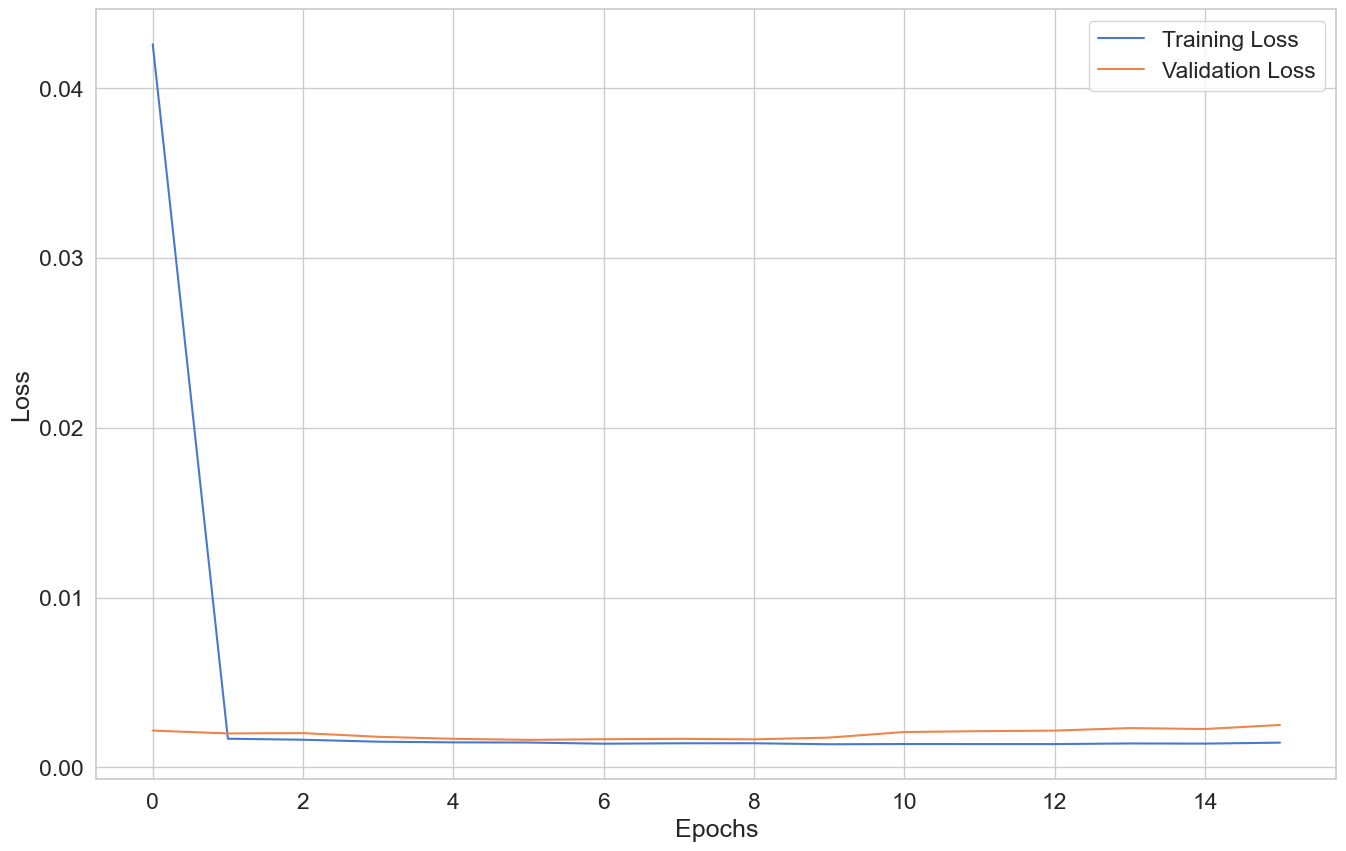

In [66]:
# 设置优化器和学习率
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# 创建模型
model = keras.models.Sequential([
	keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
	keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 添加早停回调
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

# 评估模型
mse_test = model.evaluate(X_test, y_test)

# 打印测试集上的均方误差
print(f"Test MSE: {mse_test}")

# 绘制训练和验证损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [67]:
#绘制对照图
# 设置随机种子
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# 配置绘图参数
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

# 提取时间戳列
time_data2 = pd.to_datetime(raw_dataset[-2000:]['timestamp'])


In [68]:
# 预测
y_pred2 = model.predict(UV_data2[-2000:])

# 反标准化
y_pred2 = scaler.inverse_transform(y_pred2).flatten()
#UV_target2 = scaler.inverse_transform(UV_target.reshape(-1, 1)).flatten()

print(y_pred2.max())
print(y_pred2.min())
print(y_pred2.mean())

print(UV_target.max())
print(UV_target.min())
print(UV_target.mean())


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
4.6560025
-0.0031532564
1.2593824
4.7934002876282
-0.008500000461936
0.9614054045944791


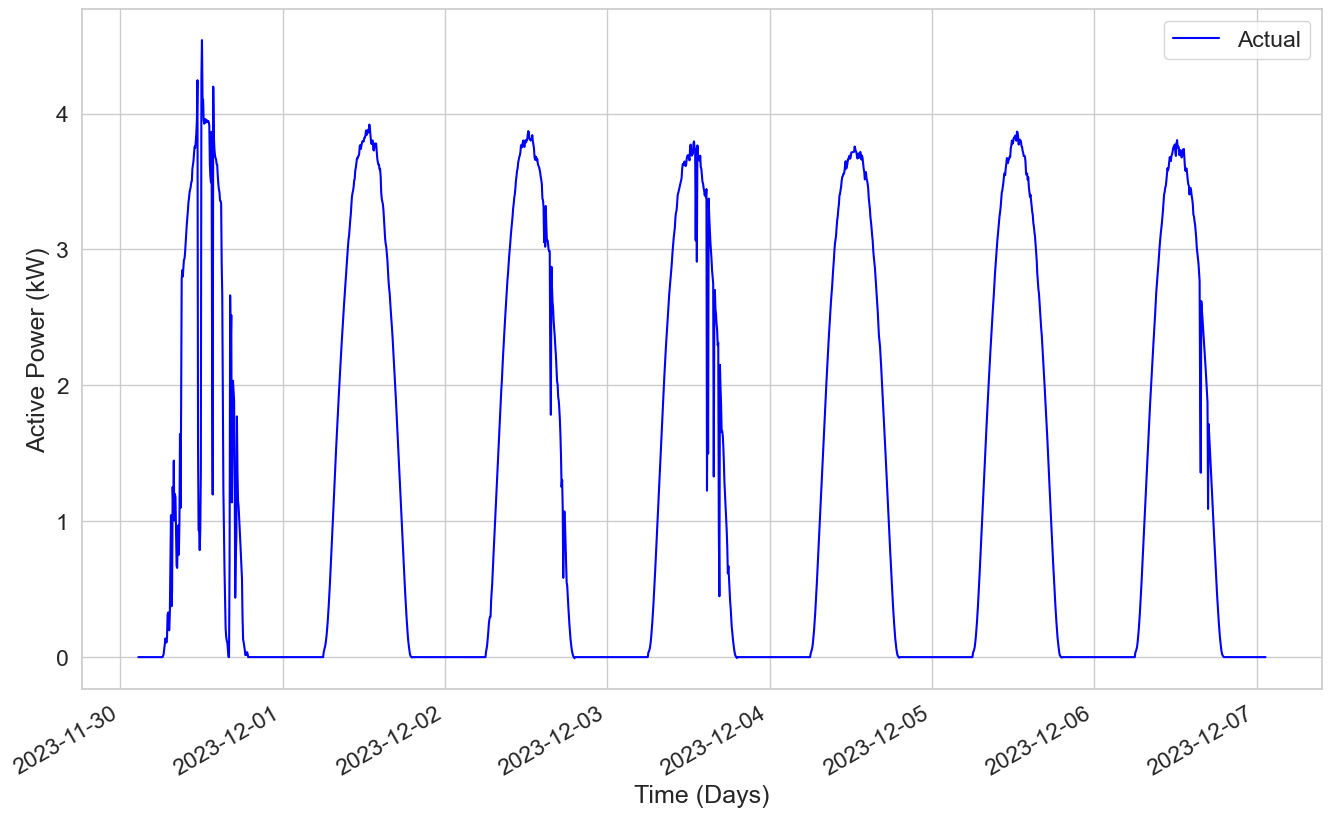

In [69]:
# 绘制图表
fig = plt.figure(dpi=100)
plt.plot(time_data2, UV_target[-2000:], c='blue', label='Actual')
plt.xlabel('Time (Days)')
plt.ylabel('Active Power (kW)')
plt.legend()

# 设置x轴标签格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))  # 每5天显示一个标签

# 自动旋转日期标签
fig.autofmt_xdate()

plt.show()

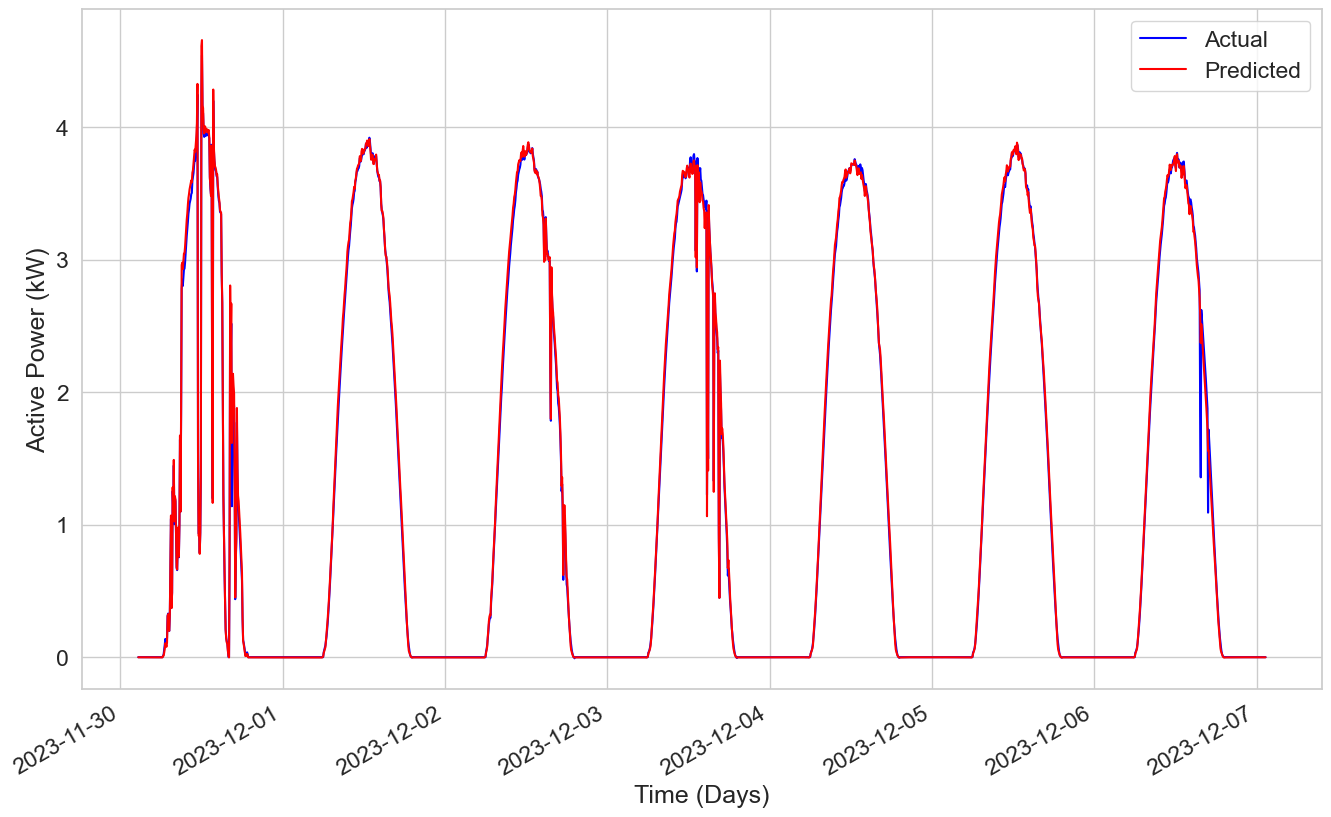

In [70]:
# 绘制图表
fig = plt.figure(dpi=100)
plt.plot(time_data2, UV_target[-2000:], c='blue', label='Actual')
plt.plot(time_data2, y_pred2[-2000:], c='red', label='Predicted')
plt.xlabel('Time (Days)')
plt.ylabel('Active Power (kW)')
plt.legend()

# 设置x轴标签格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))  # 每5天显示一个标签

# 自动旋转日期标签
fig.autofmt_xdate()

plt.show()

In [71]:
y_pred2[-2000:]

array([-0.0010898 , -0.00137203, -0.0010898 , ..., -0.0010898 ,
       -0.0010898 , -0.00120913], dtype=float32)

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(UV_target[-2000:],y_pred2[-2000:])

np.float64(0.00284983304442109)

In [73]:
result=pd.DataFrame(y_pred2[-1990:],columns=['power_bp_spatial'],index=time_data2[-1990:])
result

,power_bp_spatial
timestamp,
2023-11-30 03:30:00,-0.001090
2023-11-30 03:35:00,-0.001090
2023-11-30 03:40:00,-0.001095
2023-11-30 03:45:00,-0.001090
2023-11-30 03:50:00,-0.001139
...,...
2023-12-07 01:00:00,-0.001090
2023-12-07 01:05:00,-0.001090
2023-12-07 01:10:00,-0.001090


In [74]:
result.to_csv('bp_spatial.csv')